# Jensen Shannon Divergence

The Jensen Shannon Divergence (JSD) is a measure of similarity between two probability distributions. It is a symmetric and bounded metric that ranges from 0 to 1. 

The JSD is defined as the average of the Kullback-Leibler Divergence (KLD) between the two distributions and the KLD of each distribution with the average distribution.

The Jensen-Shannon divergence function is defined as:

$$
JSD(P, Q) = \frac{1}{2} KL(P || M) + \frac{1}{2} KL(Q || M)
$$

Explicitly, this is:

$$
JSD(P, Q) = \frac{1}{2} \sum_x P(x) \log \frac{P(x)}{M(x)} + \frac{1}{2} \sum_x Q(x) \log \frac{Q(x)}{M(x)}
$$

where $KL(P || Q)$ is the Kullback-Leibler divergence between two probability distributions $P$ and $Q$, and $M = \frac{1}{2}(P + Q)$ is the average of the two distributions.

Because it is a metric, it offers some advantages over other divergence functions. 

- Defined when the **model distribution q is zero for some values of x, which is not the case for the KL divergence**.

- **Bounded** between 0 and 1, which makes it easier to interpret than the KL divergence.

KL Divergence (Binomial || Mixed Average): 0.0034185403564350124
KL Divergence (Poisson || Mixed Average): 0.002896357341503124
Jensen-Shannon Divergence (Binomial || Mixed Average): 0.03610104319065566


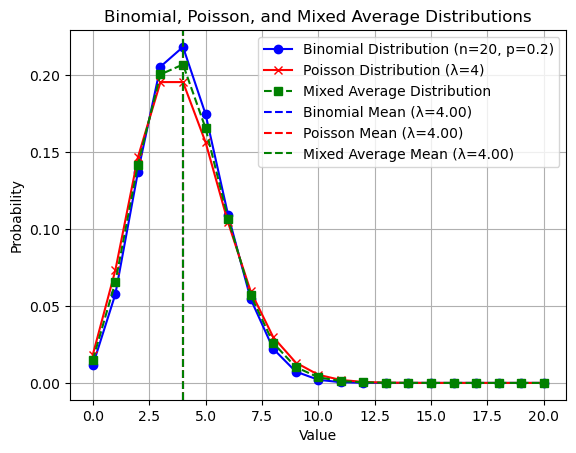

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson
from scipy.special import kl_div
from scipy.spatial.distance import jensenshannon

# Parameters
n = 20
p = 0.2
lambda_poisson = 4

# Binomial distribution
binom_dist = binom.pmf(np.arange(n + 1), n, p)

# Poisson distribution
poisson_dist = poisson.pmf(np.arange(n + 1), lambda_poisson)

# Ensure distributions sum to 1 for numerical stability
binom_dist /= np.sum(binom_dist)
poisson_dist /= np.sum(poisson_dist)

# Mixed average distribution
mixed_avg_dist = (binom_dist + poisson_dist) / 2

# Jensen-Shannon Divergence (JSD) for mixed averages
jsd_avg = jensenshannon(binom_dist, mixed_avg_dist, base=2)

# KL Divergence between mixed average and original distributions
kl_binom_to_avg = np.sum(kl_div(binom_dist, mixed_avg_dist))
kl_poisson_to_avg = np.sum(kl_div(poisson_dist, mixed_avg_dist))

# Print results
print(f"KL Divergence (Binomial || Mixed Average): {kl_binom_to_avg}")
print(f"KL Divergence (Poisson || Mixed Average): {kl_poisson_to_avg}")
print(f"Jensen-Shannon Divergence (Binomial || Mixed Average): {jsd_avg}")

# Plot distributions
x_vals = np.arange(n + 1)

# Plot Binomial distribution
plt.plot(x_vals, binom_dist, label=f'Binomial Distribution (n={n}, p={p})', color='blue', marker='o')

# Plot Poisson distribution
plt.plot(x_vals, poisson_dist, label=f'Poisson Distribution (λ={lambda_poisson})', color='red', marker='x')

# Plot Mixed Average distribution
plt.plot(x_vals, mixed_avg_dist, label='Mixed Average Distribution', color='green', linestyle='--', marker='s')

# Plot averages (means)
binom_mean = n * p
poisson_mean = lambda_poisson
mixed_avg_mean = np.sum(x_vals * mixed_avg_dist)  # Mean of the mixed distribution
plt.axvline(binom_mean, color='blue', linestyle='--', label=f'Binomial Mean (λ={binom_mean:.2f})')
plt.axvline(poisson_mean, color='red', linestyle='--', label=f'Poisson Mean (λ={poisson_mean:.2f})')
plt.axvline(mixed_avg_mean, color='green', linestyle='--', label=f'Mixed Average Mean (λ={mixed_avg_mean:.2f})')

# Customize plot
plt.title('Binomial, Poisson, and Mixed Average Distributions')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate the average distribution
average_dist = (binom_dist + poisson_dist) / 2

# Calculate the KL divergence between each distribution and the average distribution
kl_binom_avg = np.sum(kl_div(binom_dist, average_dist))
kl_poisson_avg = np.sum(kl_div(poisson_dist, average_dist))

# Calculate the Jensen-Shannon Divergence (JSD)
jsd = 0.5 * (kl_binom_avg + kl_poisson_avg)

print(f"Jensen-Shannon Divergence (using KL expressions): {jsd}")

Jensen-Shannon Divergence (using KL expressions): 0.003157448848969068


In [11]:
# Calculate JSD using scipy function
jsd_scipy = jensenshannon(binom_dist, poisson_dist, base=2.71)

print(f"Jensen-Shannon Divergence (using scipy function): {jsd_scipy}")
print(f"Jensen-Shannon Divergence (previously calculated): {jsd}")

# Check if they are equal
print(f"Are the JSD values equal? {'Yes' if np.isclose(jsd_scipy, jsd) else 'No'}")

Jensen-Shannon Divergence (using scipy function): 0.05627710783848707
Jensen-Shannon Divergence (previously calculated): 0.003157448848969068
Are the JSD values equal? No
